In [13]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from dataset import CamLocDataset # To load the dataset
L1_grad = torch.load("gradients_L1.pt") # Load gradients of four images with L1 loss
L2_grad = torch.load("gradients_L2.pt") # Load gradients of four images with L2 loss
images_dt = CamLocDataset(root_dir="/home/alan/Desktop/ace_mt_Copy/datasets/7scenes_chess/test_twenty",
                          mode=1)

FGSM adversarial attack 

In [14]:
# Setup dataloader. Batch size 1 by default.
test1 = DataLoader(images_dt, shuffle=False, num_workers=6)
images_dt.valid_file_indices # indices for test_advTWO 0,1,11,12

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [18]:
q=0
for image_B1HW, _, gt_pose_B44, _, intrinsics_B33, _, gt_sc, filenames in test1:
            print(gt_sc) # added gt_sc
            #print(filenames)
            #print(type(filenames[0]))
            q=q+1
q


tensor([[[[ 0.0000, -0.9277,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000, -0.9364, -0.9231,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000, -0.9496, -0.9134,  ...,  0.0000,  0.0000,  0.0000],
          ...,
          [-1.0111, -0.9867, -0.9573,  ...,  1.3377,  1.3779,  0.0000],
          [-0.9992, -0.9652, -0.9465,  ...,  1.3226,  1.3699,  0.0000],
          [-0.9826, -0.9645, -0.9357,  ...,  1.3155,  1.3545,  0.0000]],

         [[ 0.0000, -0.8242,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000, -0.7996, -0.8012,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000, -0.7744, -0.7760,  ...,  0.0000,  0.0000,  0.0000],
          ...,
          [ 0.7320,  0.7383,  0.7367,  ...,  0.7132,  0.7210,  0.0000],
          [ 0.7417,  0.7322,  0.7474,  ...,  0.7248,  0.7409,  0.0000],
          [ 0.7435,  0.7591,  0.7575,  ...,  0.7447,  0.7521,  0.0000]],

         [[ 0.0000,  1.2686,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  1.2791,  

20

In [9]:
frame_00 = images_dt._load_image(0)
frame_01 = images_dt._load_image(1)
frame_11 = images_dt._load_image(11)
frame_12 = images_dt._load_image(12)

frames_o= [frame_00,frame_01,frame_11,frame_12]

epsilon_values = np.round(np.linspace(start=0.05, stop= 1, num=100),3)
print(epsilon_values)

[0.05  0.06  0.069 0.079 0.088 0.098 0.108 0.117 0.127 0.136 0.146 0.156
 0.165 0.175 0.184 0.194 0.204 0.213 0.223 0.232 0.242 0.252 0.261 0.271
 0.28  0.29  0.299 0.309 0.319 0.328 0.338 0.347 0.357 0.367 0.376 0.386
 0.395 0.405 0.415 0.424 0.434 0.443 0.453 0.463 0.472 0.482 0.491 0.501
 0.511 0.52  0.53  0.539 0.549 0.559 0.568 0.578 0.587 0.597 0.607 0.616
 0.626 0.635 0.645 0.655 0.664 0.674 0.683 0.693 0.703 0.712 0.722 0.731
 0.741 0.751 0.76  0.77  0.779 0.789 0.798 0.808 0.818 0.827 0.837 0.846
 0.856 0.866 0.875 0.885 0.894 0.904 0.914 0.923 0.933 0.942 0.952 0.962
 0.971 0.981 0.99  1.   ]


L1 loss adversarial examples

In [49]:
mean =0.4
sd= 0.25
i=0
for frame in frames_o:
    j=0 
    gradientL1 =torch.sign(L1_grad[i])
    for eps in epsilon_values:
        # Unormalized
        perturbation3 = (gradientL1*sd + mean) * eps # torch.Size([1, 1, 480, 640])
        perturbation3 = perturbation3.squeeze() #torch.Size([480, 640])
        
        transforms1 = transforms.Compose([
            transforms.ToPILImage(),
            transforms.Grayscale(num_output_channels=3)
            ])
        perturbation4 = transforms1(perturbation3)

        np_img=np.array(perturbation4)
        image1 = np.array(frame)
        
        if i >= 2:
            a = 5
        else:
            a= 3
        
        # Save adversarial perturbation
        img_adv_to_png = Image.fromarray(np_img.astype(np.uint8))
        save_path_adv_per= f"/home/alan/Desktop/ace_mt_Copy/datasets/7scenes_chess/L1advTWO_advper{i}/seq-0{a}-frame{j:06}.png"
        img_adv_to_png.save(save_path_adv_per)

        img_adv2 = image1 + np_img
        img_adv2 = np.clip(img_adv2, 0, 255)
        
        # Save the adversarial example
        img_to_png = Image.fromarray(img_adv2.astype(np.uint8))
        save_path_adv_ex = f"/home/alan/Desktop/ace_mt_Copy/datasets/7scenes_chess/L1advTWO_advex{i}/seq-0{a}-frame{j:06}.color.png"
        img_to_png.save(save_path_adv_ex)
        
        j=j+1
    i=i+1

L2 Loss adversarial examples

In [50]:
i=0
for frame in frames_o:
    j=0 
    gradientL2 =torch.sign(L2_grad[i])
    for eps in epsilon_values:
        # Unormalized
        perturbation3 = (gradientL2*sd + mean) * eps # torch.Size([1, 1, 480, 640])
        perturbation3 = perturbation3.squeeze() #torch.Size([480, 640])
        
        transforms1 = transforms.Compose([
            transforms.ToPILImage(),
            transforms.Grayscale(num_output_channels=3)
            ])
        perturbation4 = transforms1(perturbation3)

        np_img=np.array(perturbation4)
        image1 = np.array(frame)
        
        if i >= 2:
            a = 5
        else:
            a= 3

        # Save adversarial perturbation
        img_adv_to_png = Image.fromarray(np_img.astype(np.uint8))
        save_path_adv_per= f"/home/alan/Desktop/ace_mt_Copy/datasets/7scenes_chess/L2advTWO_advper{i}/seq-0{a}-frame{j:06}.png"
        img_adv_to_png.save(save_path_adv_per)

        img_adv2 = image1 + np_img
        img_adv2 = np.clip(img_adv2, 0, 255)
        
        # Save the adversarial example
        img_to_png = Image.fromarray(img_adv2.astype(np.uint8))
        save_path_adv_ex = f"/home/alan/Desktop/ace_mt_Copy/datasets/7scenes_chess/L2advTWO_advex{i}/seq-0{a}-frame{j:06}.color.png"
        img_to_png.save(save_path_adv_ex)
        
        j=j+1
    i=i+1

In [ ]:
for image_B1HW, _, gt_pose_B44, _, intrinsics_B33, _, gt_sc, filenames in test1:
    print(image_B1HW.size()) # 1 dimension
    print(type(image_B1HW)) # Tensor
    print(gt_sc.size())

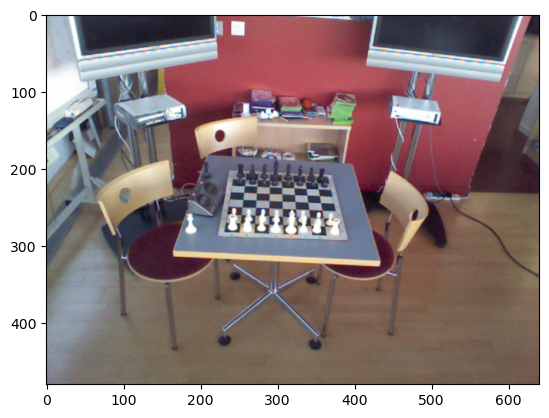

In [4]:
# Load Original image
image1 = images_dt._load_image(0)
plt.imshow(image1)

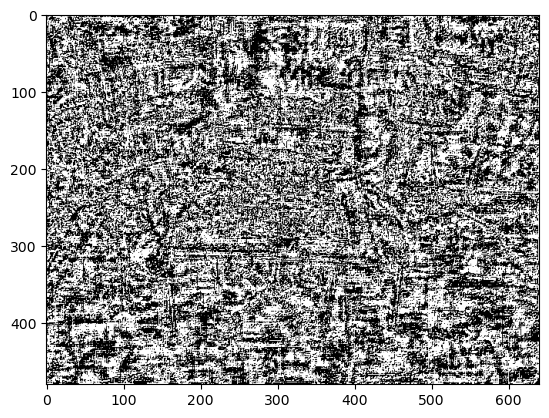

In [5]:
# Create the perturbation and define the parameters
epsilon = 0.1
gradient =torch.sign(L1_grad[0])
perturbation1 = epsilon*gradient
perturbation=perturbation1.squeeze() # tensor # tensor [1,1,480, 640]
plt.imshow(perturbation.cpu(), cmap='gray')

perturbation

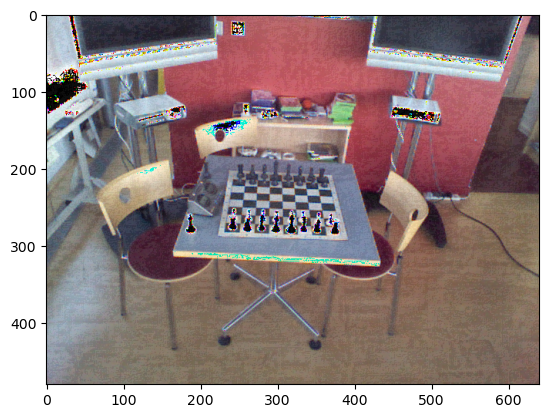

In [48]:
epsilon = 0.1
mean =0.4
sd= 0.25


# Unormalized
perturbation3 = (gradient*sd + mean) * epsilon # torch.Size([1, 1, 480, 640])
perturbation3 = perturbation3.squeeze() #torch.Size([480, 640])
#print(perturbation3)
#print(perturbation3.size())

transforms1 = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Grayscale(num_output_channels=3)
])
perturbation4 = transforms1(perturbation3)

np_img=np.array(perturbation4)
image1 = np.array(image1)
img_adv2 = image1 + np_img
img_adv2 = np.clip(img_adv2, 0, 255)
#print(image1)
#print(image1.max(), image1.min())
#print(img_adv.max(), img_adv.min())
plt.imshow(img_adv2)


In [49]:
img_to_png = Image.fromarray(img_adv2.astype(np.uint8))
save_path = "/home/alan/Desktop/ace_mt_Copy/datasets/7scenes_chess/test_adv/seq-03-frame-000000.color.png"

img_to_png.save(save_path)

Create pose, depth and calibration folders and files